In [ ]:
%cd D:/Documents/SEMESTER 8/EE405 - Undergraduate Project/INR/Playground/Wire Implementation

D:\Documents\SEMESTER 8\EE405 - Undergraduate Project\INR\Playground\Wire Implementation


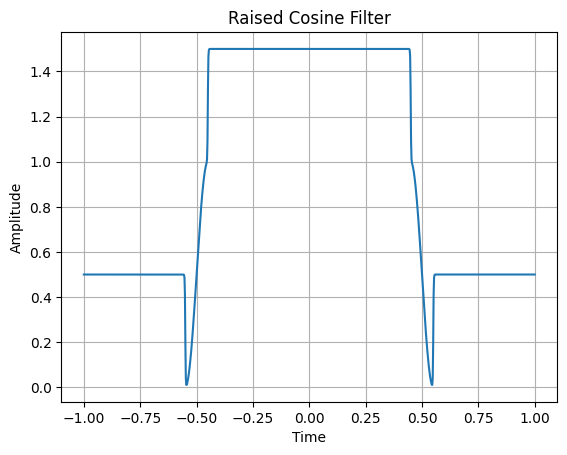

In [2]:
import cv2
import numpy as np
import scipy.io as io
import matplotlib.pyplot as plt

import torch

from modules.utils import psnr

In [3]:
mat_2 = io.loadmat('./results/denoising/raisedCos_T0.2_b0.6_noisy(False)_hiddenLayrs(2).mat')
mat_3 = io.loadmat('./results/denoising/raisedCos_T0.2_b0.6_noisy(False)_hiddenLayrs(3).mat')
mat_4 = io.loadmat('./results/denoising/raisedCos_T0.2_b0.6_noisy(False)_hiddenLayrs(4).mat')

In [5]:
mats = [mat_2, mat_3, mat_4]

In [4]:
mat_2.keys()

dict_keys(['__header__', '__version__', '__globals__', 'rec', 'epoch', 'gt', 'im_noisy', 'mse_noisy_array', 'mse_array', 'consts_array', 'time_array'])

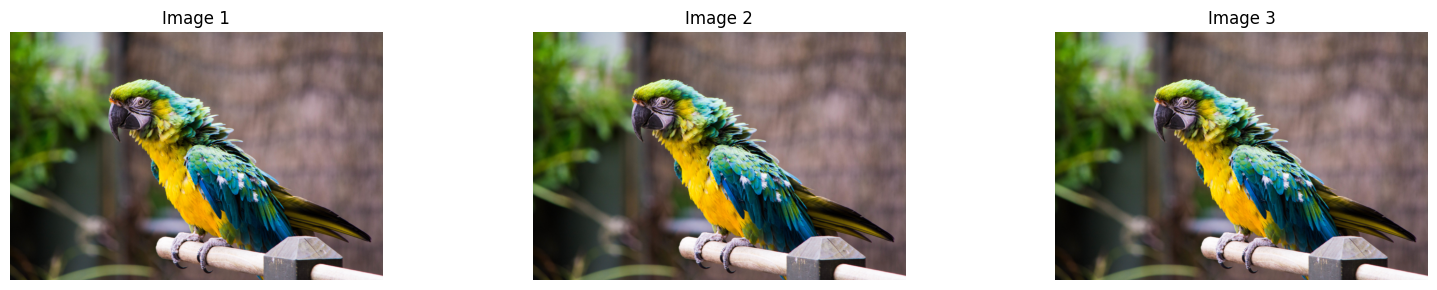

In [25]:
import matplotlib.pyplot as plt

# Create a figure and 4 subplots in a 1x4 grid
fig, axes = plt.subplots(1, 3, figsize=(16, 3))
x = np.arange(2000)

# Example data for each subplot
for i in range(3):
    axes[i].imshow(mats[i]['gt'], cmap='gray')
    axes[i].set_title(f'Image {i+1}')
    axes[i].axis('off')  # Turn off the axis

# Display the plot
plt.tight_layout()
plt.show()


In [32]:
mat_2['consts_array'][0][1999]

array([0.43133578, 0.03419853, 0.02830065])

In [24]:
psnr(mat_2['gt'], mat_2['rec'])

23.323843479156494